In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install emoji --upgrade

     |████████████████████████████████| 170 kB 13.7 MB/s 
  Created wheel for emoji: filename=emoji-1.6.1-py3-none-any.whl size=169314 sha256=c35f209dbc60aed830a0bcac4e21f52a367b436c4f34a5796d941ebd8bf58480
  Stored in directory: /root/.cache/pip/wheels/ea/5f/d3/03d313ddb3c2a1a427bb4690f1621eea60fe6f2a30cc95940f
Successfully built emoji


In [3]:
import re
import pandas as pd
import numpy as np
import os
pd.set_option('display.max_rows',500)
import datetime as dt
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter
import string
import emoji

import warnings
warnings.filterwarnings("ignore")


In [4]:
def read(file):
  f=open('/content/drive/My Drive/My Resume Project/Whatsapp personal chat analysis/Chats/{}'.format(file),'r')
  messages = re.findall('(\d+/\d+/\d+, \d+:\d+) - (.*?): (.*)', f.read())
  f.close()
  hist = pd.DataFrame(messages,columns=['date','name','msg'])
  hist['date'] = pd.to_datetime(hist['date'],format="%d/%m/%Y, %H:%M")
  hist['msg_len'] = hist['msg'].str.len()
  hist['date1'] = hist['date'].apply(lambda x: x.date())
  return hist

  # Code to check later
    # messages = re.findall('(\d+/\d+/\d+, \d+:\d+) - (.*?): (.*)', f.read())
    # f.close()
    # hist = pd.DataFrame(messages,columns=['date','name','msg'])
    # hist['date'] = pd.to_datetime(hist['date'],format="%d/%m/%Y, %H:%M")
    # hist['msg_len'] = hist['msg'].str.len()
    # hist['date1'] = hist['date'].apply(lambda x: x.date())
    # hist['count']=1
    # return hist
    # Code to check later
    # messages=re.findall('(\d+/\d+/\d+, \d+:\d+\d+ ([\w]+)) - (.*?): (.*)', f.read())

In [5]:
 files=os.listdir('/content/drive/My Drive/My Resume Project/Whatsapp personal chat analysis/Chats')
 lst=[]
 for file in files:
    history=read(file)
    lst.append(history)
 history=pd.concat(lst).reset_index()

#  Code to check later
  # files[0]
  # if file.endswith(".txt"):
  # print(file)
   

In [6]:

history

# Code to check later
  # lst
  # files

,index,date,name,msg,msg_len,date1
0,0,2018-07-04 20:42:00,17'5 45!-!15!-! @ NIT Dgp | Civil,<Media omitted>,15,2018-07-04
1,1,2018-07-04 20:42:00,17'5 45!-!15!-! @ NIT Dgp | Civil,<Media omitted>,15,2018-07-04
2,2,2018-07-04 20:42:00,17'5 45!-!15!-! @ NIT Dgp | Civil,<Media omitted>,15,2018-07-04
3,3,2018-07-08 11:32:00,Sourav @ NIT Dgp | Civil,<Media omitted>,15,2018-07-08
4,4,2018-07-08 11:32:00,Sourav @ NIT Dgp | Civil,Kal se class,12,2018-07-08
...,...,...,...,...,...,...
62060,3976,2021-12-12 12:32:00,Subhash,Group Mai tag kiye h,20,2021-12-12
62061,3977,2021-12-12 12:32:00,Subhash,Bol waha,8,2021-12-12
62062,3978,2021-12-12 12:32:00,Subhash,..,2,2021-12-12
62063,3979,2021-12-12 12:33:00,Mjay,Hm bhi kr diuye,15,2021-12-12


In [7]:
history.count()

index      62065
date       62065
name       62065
msg        62065
msg_len    62065
date1      62065
dtype: int64

In [8]:
#Data Cleaning
history_clean=history[history['msg']!='<Media omitted>']

In [9]:
history_clean.iloc[27000:280009]

,index,date,name,msg,msg_len,date1
29116,135,2021-10-07 16:14:00,Sagnik @ TCS,Sick leave could be an option,29,2021-10-07
29117,136,2021-10-07 16:14:00,Subhash Dixit,Do we have to provide documents for that?,41,2021-10-07
29118,137,2021-10-07 16:15:00,Sagnik @ TCS,"For one or two days, you need not",33,2021-10-07
29119,138,2021-10-07 16:16:00,Subhash Dixit,Okay. How many hours do you work normally?,42,2021-10-07
29120,139,2021-10-07 16:16:00,Sagnik @ TCS,Me also had to listen that..,28,2021-10-07
...,...,...,...,...,...,...
62060,3976,2021-12-12 12:32:00,Subhash,Group Mai tag kiye h,20,2021-12-12
62061,3977,2021-12-12 12:32:00,Subhash,Bol waha,8,2021-12-12
62062,3978,2021-12-12 12:32:00,Subhash,..,2,2021-12-12
62063,3979,2021-12-12 12:33:00,Mjay,Hm bhi kr diuye,15,2021-12-12


In [10]:
history_clean[history_clean['name']=='Subhash Dixit']['msg'].count()

8188

In [11]:
history_clean['name'].nunique()

412

In [12]:
#Dataset with my messages only
msg_subhash=(history_clean[history_clean['name']=='Subhash Dixit'])

In [13]:
msg_subhash

,index,date,name,msg,msg_len,date1
44,44,2018-07-09 12:55:00,Subhash Dixit,SUBHASH DIXIT,13,2018-07-09
193,193,2018-07-11 09:32:00,Subhash Dixit,Nahi,4,2018-07-11
196,196,2018-07-11 09:33:00,Subhash Dixit,Oo,2,2018-07-11
197,197,2018-07-11 09:33:00,Subhash Dixit,Ok,2,2018-07-11
216,216,2018-07-12 00:48:00,Subhash Dixit,Happy Birthday Ankush,21,2018-07-12
...,...,...,...,...,...,...
58005,418,2021-05-05 21:38:00,Subhash Dixit,Yes,3,2021-05-05
58012,425,2021-05-06 13:19:00,Subhash Dixit,😂,1,2021-05-06
58065,478,2021-10-24 11:04:00,Subhash Dixit,Khela hobe?,11,2021-10-24
58068,481,2021-10-24 11:05:00,Subhash Dixit,Cricket toh? Kota diye?,23,2021-10-24


In [14]:
msg_subhash.shape

(8188, 6)

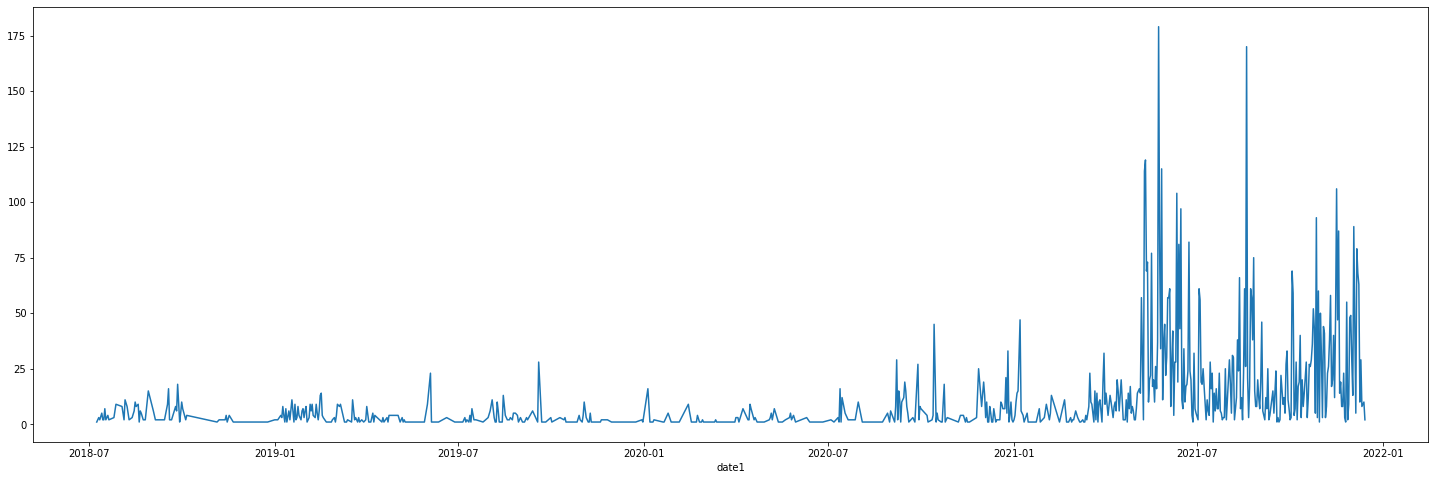

In [15]:
#Message plot
plt.figure(figsize=(25,8))
msg_subhash.groupby(['date1']).count()['msg'].plot()

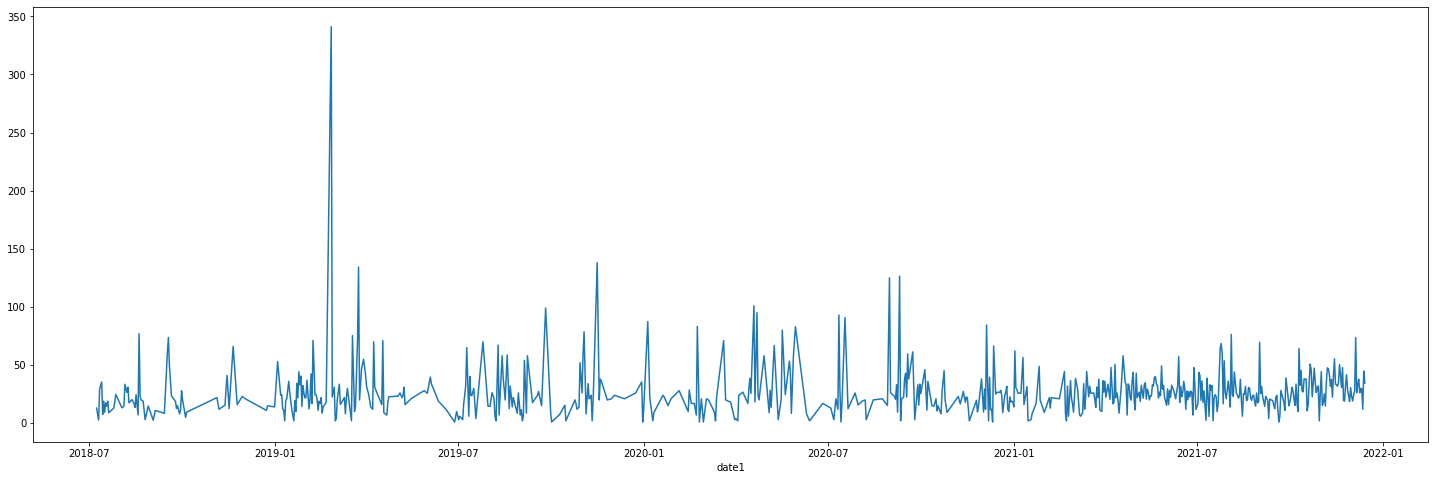

In [16]:
# Message length plot 
plt.figure(figsize=(25,8))
msg_subhash.groupby(['date1'])['msg_len'].mean().plot()
# history_clean.groupby(['date1'])['msg_len'].mean().plot()
# msg_subhash.groupby(['date1'])['msg_len'].plot()

In [17]:
msg_subhash[msg_subhash['msg_len'] == msg_subhash['msg_len'].max()]['msg'].values

array(['Mar har CHiz Mai ready Hu...Aur Jo sab Karega wahi Mera decision hai....but remember one thing Humlog jyada SE jyada Director ke pass ja sakte hai....But yeh sab log sale ek Hei khet ke muli hai....Nahi sunega koi hamara bat.....chahe Humlog Kuch bhi Kar le....yehi reality hai Aur Jo accept Kar lega Uske liye Sahi Hoga.....SalA 3 Saal SE Kam try thodi Hua hai aajtak Kuch CHiz Nahi hua Humlog ke man SE....yeh log class Nahi chorte hai subject change Karna Toh Bahut Bari bat hai....Josh Josh Mai bas jyada Kuch na ho Jaye ....Nahi Toh consequences Bahut Bura ho Sakta hai.... atleast Sahi SE degree mil Jaye taki bad Mai kuch ho paye.... agar 30 log awaj uthayengee including me Toh Mai Sath Hu....majority Hona Chahiye....Nahi Toh Kuch log Ko yeh log ache se subject change Kara dega.....abhi SE count karte Hai....30 SE jyada hai ya Nahi majority Mai....'],
      dtype=object)

In [18]:
# Weekday message count
msg_subhash['day']=msg_subhash['date'].dt.day_name()
date_month_day=msg_subhash['day'].value_counts()
date_month_day.sort_index()

Friday       1094
Monday       1465
Saturday      726
Sunday        860
Thursday     1389
Tuesday      1317
Wednesday    1337
Name: day, dtype: int64

In [19]:
#  Hour message count
msg_subhash['datehour']=msg_subhash['date'].dt.hour
date_month_hour=msg_subhash['datehour'].value_counts()
date_month_hour.sort_index()

0     384
1      78
2      48
3       8
4       6
5      42
6      63
7      52
8     134
9     231
10    357
11    552
12    392
13    685
14    609
15    400
16    409
17    357
18    425
19    517
20    717
21    539
22    672
23    511
Name: datehour, dtype: int64

In [20]:
#  Month message count
msg_subhash['datemonth']=msg_subhash['date'].dt.month
date_month_sorted=msg_subhash['datemonth'].value_counts()
date_month_sorted.sort_index()
filename='date_month_sorted.xlsx'
date_month_sorted.to_excel(filename)


In [25]:
#  Counting number of emojis
def extract_emojis(str):
  return ''.join(c for c in str if c in emoji.UNICODE_EMOJI['en'])

def Count_Emojis(df):
  series=df['msg']
  all_words=""
  for sentence in series:
    all_words+=extract_emojis(sentence)
  word_count=Counter(all_words)
  return word_count
  
  ordered={}
  ordered['msg']=[]
  for key,number in word_count.most_common()[:50]:
    ordered[key]=[]
  for sentence in series:
    sentence_count=Counter(extract_emojis(sentence))
    
    for word in ordered:
      count=sentence_count[word] if sentence_count[word] else 0
      ordered[word]+=[count]
  
  ordered['msg']=list(series)
  ordered['date']=list(df['date'])
  ordered['date1']=list(df['date1'])
  ordered['name']=list(df['name'])
  return pd.DataFrame(ordered)

In [26]:
# word=Count_Emojis(msg_subhash)
emojis_counts=Count_Emojis(msg_subhash)
# emojis_counts.head(20)

# w_c=Count_Emojis(msg_subhash)
# w_c

In [33]:
# emoji_freq=emojis_counts.sum()
# emoji_freq=emojis_counts.sum()
emojis_counts

Counter({'✋': 2,
         '❤': 4,
         '🆗': 1,
         '🍼': 1,
         '🎂': 29,
         '🎉': 8,
         '🎓': 1,
         '🏻': 6,
         '🏼': 2,
         '👍': 5,
         '💓': 1,
         '🔥': 18,
         '😂': 984,
         '😛': 1,
         '😭': 57,
         '🙏': 1,
         '🤔': 1,
         '🤚': 3,
         '🤣': 171,
         '🥃': 4})

In [ ]:
# emoji_freq

In [ ]:
# s=msg_subhash['msg']
# for y in s:
#   print(y)

In [ ]:
# myTuple="No no.... English Practicing bro.....log hasenge ....log chidayenge BHI....but mereko larna padega English sikhne ke liye....😂So that's why I m writing some English words so that my English will improve"
# x=''.join(c for c in myTuple if c in emoji.UNICODE_EMOJI['en'])
# x

In [ ]:
# if '\u2764' in emoji.UNICODE_EMOJI:
#   print("hello")

In [ ]:

# def text_has_emoji(s):
#   return ''.join(c for c in s if c in emoji.UNICODE_EMOJI['en'])

In [ ]:
# d=text_has_emoji("No no.... English Practicing bro.....log hasenge ....log chidayenge BHI....but mereko larna padega English sikhne ke liye....😂So that's why I m")
# d